<a href="https://colab.research.google.com/github/Shiviksha/House-Price-Prediction-in-USA/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Object**: Using publically available data for the national factors that impact supply and demand of homes in US, build a model to study the effect of these variables on home prices.

The following **variables** are chosen for the study-

1)Unemployment Rate
2)Per Capita GDP
3)Median Household Income
4)CPI
5)Mortgage Rates
6)Number of new houses supplied
7)Number of Housing Units in USA

The data has been downloaded from https://fred.stlouisfed.org/

The factors are chosen based on papers referred which conclude statistically significant factors in determining the house prices.

**Papers referred:**

https://www.atlantis-press.com/article/125971723.pdf

http://dl.uncw.edu/Etd/2017-3/r1/naqvis/syednaqvi.pdf

In [6]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#loading the dataset

#the data was downloaded and collated using Google Sheets.
#The data that was quarterly or yearly available was interpolated to match the monthly available data on House Price Index

df=pd.read_csv("/content/House Price Prediction USA - HPI Data Sheet .csv")
df.head()

,Date,HPI,GDP,new_housing_units,mortgage_rate,CPI,share_prices,unemployment_rate,housing_inventory,income_per_capita
0,2002-01-01,117.144,37582,50091,7.16,75.891181,52.275921,6.3,119061,31480
1,2002-02-01,117.845,37582,50091,7.02,75.891181,52.275921,6.1,119061,31480
2,2002-03-01,118.687,37582,50091,6.80,75.891181,52.275921,6.1,119061,31480
3,2002-04-01,119.611,37860,50286,7.18,75.891181,52.275921,5.7,119483,31755
4,2002-05-01,120.724,37860,50286,6.88,75.891181,52.275921,5.5,119483,31755


#Data Preprocessing

In [7]:
#to check for null values
df.isnull().sum()

Date                 0
HPI                  0
GDP                  0
new_housing_units    0
mortgage_rate        0
CPI                  0
share_prices         0
unemployment_rate    0
housing_inventory    0
income_per_capita    0
dtype: int64

In [8]:
#to set the date as Index column
df=df.set_index("Date")
df.head()

,HPI,GDP,new_housing_units,mortgage_rate,CPI,share_prices,unemployment_rate,housing_inventory,income_per_capita
Date,,,,,,,,,
2002-01-01,117.144,37582,50091,7.16,75.891181,52.275921,6.3,119061,31480
2002-02-01,117.845,37582,50091,7.02,75.891181,52.275921,6.1,119061,31480
2002-03-01,118.687,37582,50091,6.80,75.891181,52.275921,6.1,119061,31480
2002-04-01,119.611,37860,50286,7.18,75.891181,52.275921,5.7,119483,31755
2002-05-01,120.724,37860,50286,6.88,75.891181,52.275921,5.5,119483,31755


In [9]:
df.shape

(252, 9)

#Exploratory Data Analysis

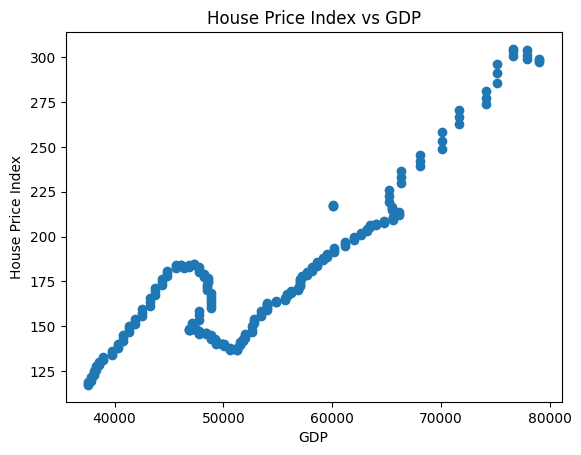

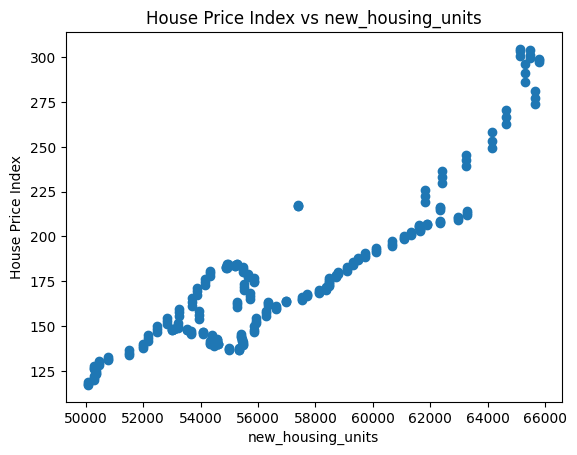

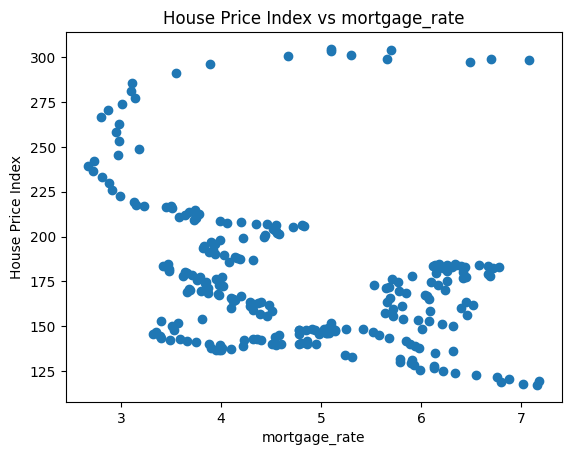

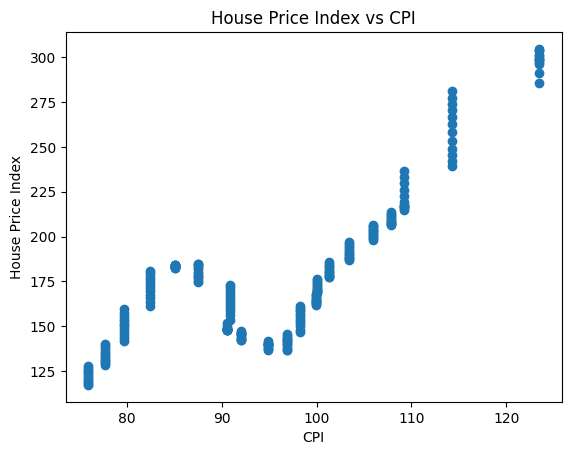

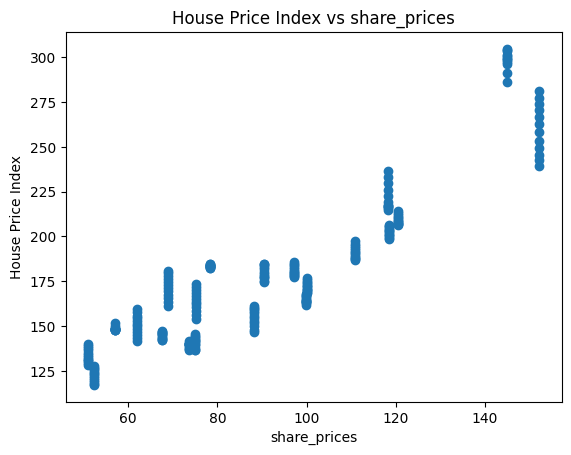

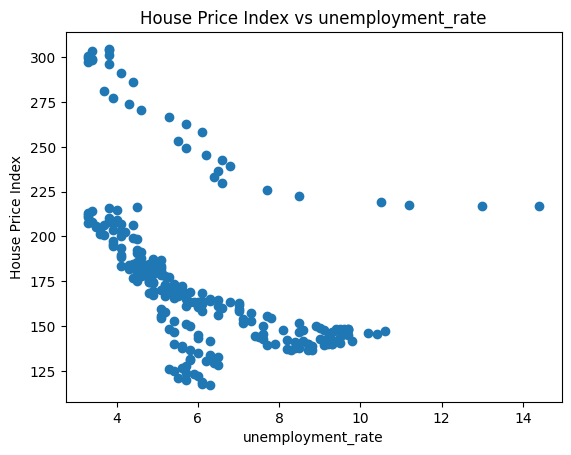

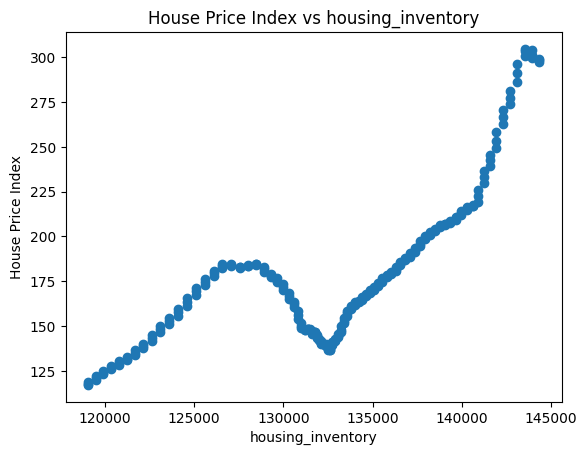

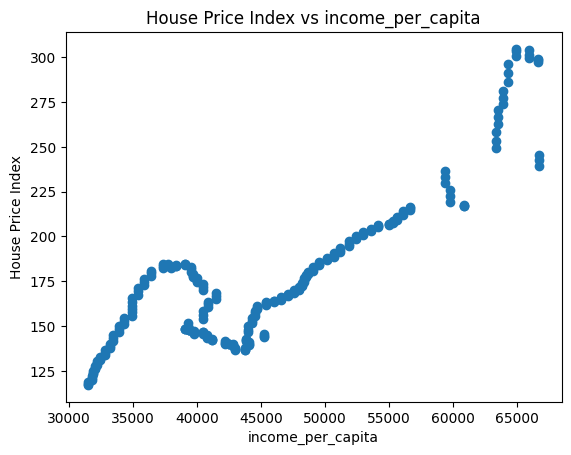

In [10]:
#Separating the target value and the variable matrix

#variable matrix
X=df.drop('HPI',axis=1)

#target value
y=df['HPI']

#To check for the condition of linearity before fitting data to the model
for variable in X.columns:
    plt.figure()
    plt.scatter(x = X[variable], y = y)
    plt.xlabel(variable)
    plt.ylabel("House Price Index")
    plt.title(f"House Price Index vs {variable}")

In [11]:
X.head()

,GDP,new_housing_units,mortgage_rate,CPI,share_prices,unemployment_rate,housing_inventory,income_per_capita
Date,,,,,,,,
2002-01-01,37582,50091,7.16,75.891181,52.275921,6.3,119061,31480
2002-02-01,37582,50091,7.02,75.891181,52.275921,6.1,119061,31480
2002-03-01,37582,50091,6.80,75.891181,52.275921,6.1,119061,31480
2002-04-01,37860,50286,7.18,75.891181,52.275921,5.7,119483,31755
2002-05-01,37860,50286,6.88,75.891181,52.275921,5.5,119483,31755


In [12]:
#to check for the numerical value of correlation between target value and independent variables
for variable in X.columns:
  correlation= X[variable].corr(y)
  r_corr=round(correlation,3)
  print ("The correlation between", variable, "and House Price Index is", r_corr)


The correlation between GDP and House Price Index is 0.887
The correlation between new_housing_units and House Price Index is 0.902
The correlation between mortgage_rate and House Price Index is -0.319
The correlation between CPI and House Price Index is 0.819
The correlation between share_prices and House Price Index is 0.905
The correlation between unemployment_rate and House Price Index is -0.476
The correlation between housing_inventory and House Price Index is 0.776
The correlation between income_per_capita and House Price Index is 0.872


The correlation function shows a **positive** correlation of House Price Index with GDP per Capita, New Housing Units Constructed, CPI, Share Prices, Housing Inventory, and Income per Capita

It shows a **negative** correlation with mortgage rate, andunemployment rate

<Axes: >

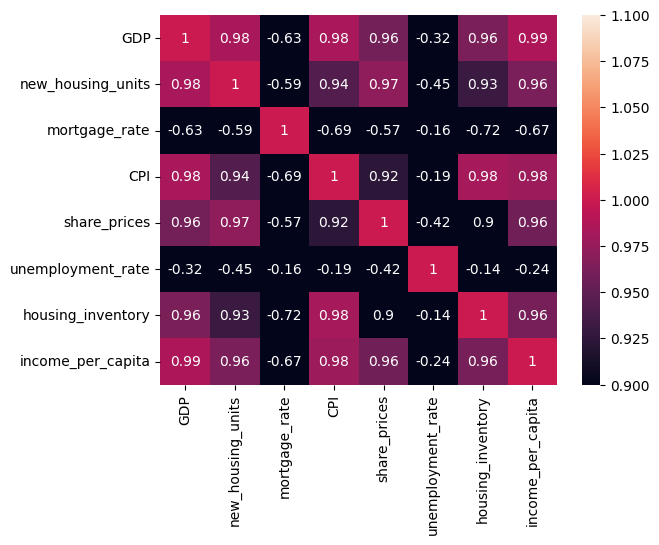

In [13]:
#heatmap is used to check the correlation among the explanatory variables

sns.heatmap(X.corr(),vmin=1,vmax=1,annot=True)

if the explanatory variables are highly correlated with each other then the **problem of multicollinearity** arises
it will make the model unpredictable and unstable

In [14]:
X.columns

Index(['GDP', 'new_housing_units', 'mortgage_rate', 'CPI', 'share_prices',
       'unemployment_rate', 'housing_inventory', 'income_per_capita'],
      dtype='object')

#Model Building

The columns which are highly correlated are dropped to avoid multicollinearity and to make a stable predictive model.

In [15]:
columns_to_drop = ['GDP', 'share_prices', 'income_per_capita', 'housing_inventory','new_housing_units']
X1=X.drop(columns_to_drop,axis=1)

#the data is scaled to Standard Scaler
scalar = StandardScaler()
X1 = scalar.fit_transform(X1)

In [16]:
#The data is divided into training and testing tests to check the model build using training set on testing test.
#This will help us to check reliabilty of the model

X_train, X_test, y_train, y_test= train_test_split(X1,y, test_size=0.3, random_state=42)
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_train)

#the r squared value will explain the amount of variability explained by the explanatory variables
r2_score(y_train, y_pred)


0.8361270054486285

In [17]:
#predicting value of the testing set using the model built on training data

regressor.fit(X_train, y_train)
y_pred1=regressor.predict(X_test)
r2_score(y_test, y_pred1)


0.7961650349616199

The r squared value on training and testing set are close to each other therefore the model is stable and will work for predictive modelling.

#We perform **cross validation** on the tarining set to check that the r2_score is stable to different fold in data and isn't fluctuating.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LinearRegression())

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.74982985 0.88747216 0.72032071 0.8319301  0.88810148]
Mean R2 Score: 0.8155308589871307


#The mean r2_score using cross validation is very close to the r2_score we achieved with training and testing data hence it suggests that the model will generalize well and is **not overfitting** to the training set and will perform **consistently**

In [29]:
# coeffients for 'mortgage_rate', 'CPI', 'unemployment_rate'
coefs = regressor.coef_
print(coefs)

[ 13.12193083  41.49473618 -10.74505477]


In [30]:
intercept= regressor.intercept_
print(intercept)

179.14121072408776
